In [2]:
import pandas as pd
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [3]:
cleaned_data

,Unnamed: 0,BROKER,LATITUDE,LONGITUDE,TYPE,BOROUGH,NEIGHBOURHOOD,BEDS,POSTCODE,BATH,PROPERTYSQFT,PRICE
0,0,277,0.633396,0.505918,2,1,264,0.166667,18,0.2,0.134948,315000
1,1,844,0.102276,0.103390,6,3,259,0.333333,54,0.2,0.205882,260000
2,2,217,0.633742,0.505683,2,1,264,0.250000,18,0.1,0.024798,69000
3,3,844,0.423098,0.534539,6,0,192,0.416667,127,0.2,0.435294,690000
4,4,277,0.750035,0.556240,2,1,264,0.166667,23,0.2,0.225399,899500
...,...,...,...,...,...,...,...,...,...,...,...,...
4501,4501,217,0.665089,0.539708,0,1,263,0.083333,40,0.1,0.225399,599000
4502,4502,591,0.563894,0.713574,0,2,196,0.083333,147,0.1,0.225399,245000
4503,4503,277,0.596189,0.453402,0,1,264,0.083333,9,0.1,0.225399,1275000
4504,4504,288,0.588660,0.690689,2,2,91,0.166667,146,0.1,0.049020,598125


In [4]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Coef: ',reg.coef_)
print('intercept_', reg.intercept_)

Coef:  [-2.62662002e+01  4.24832500e+01  1.06273516e+06  4.69906579e+05
 -6.05030269e+04 -3.92187261e+05  2.54220037e+03 -2.47245377e+06
 -1.27279034e+04  9.00825889e+06  8.25126303e+06]
intercept_ -556946.2474463198


In [7]:
y_pred = reg.predict(X_test)

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.3507572464771538
Mean Absolute Error: 1338345.034873028
Median Absolute Error: 779480.9058892394
Mean Squared Error: 6800512913069.284
Root Mean Squared Error: 2607779.306818214


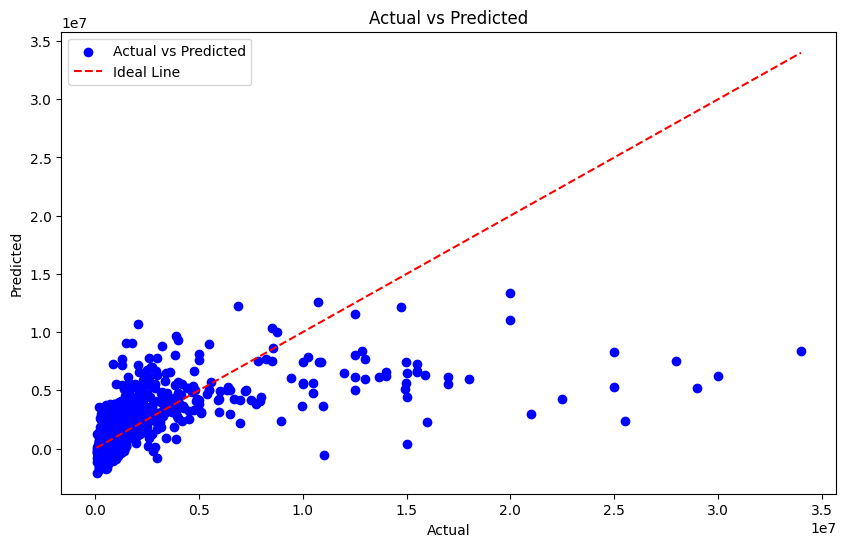

In [9]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)
pipe_linear = Pipeline([
    ('linear', LinearRegression(fit_intercept=True))
])

model_linear_scores = cross_val_score(pipe_linear, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_linear_scores

array([-1276023.23550454, -1326329.62138614, -1230205.69012434,
       -1231145.17383767, -1373480.5709609 , -1232611.42802719,
       -1278424.30065611, -1345145.75090578, -1303135.89981292,
       -1248006.150696  , -1333781.47415554, -1274435.5437935 ,
       -1202980.944482  , -1164481.21582138, -1424688.95297948,
       -1369707.00932168, -1216905.7292658 , -1375743.96009084,
       -1242251.34533497, -1228650.4493203 , -1294350.44869657,
       -1343848.89147619, -1267161.2708859 , -1356817.02311707,
       -1154223.40106715])

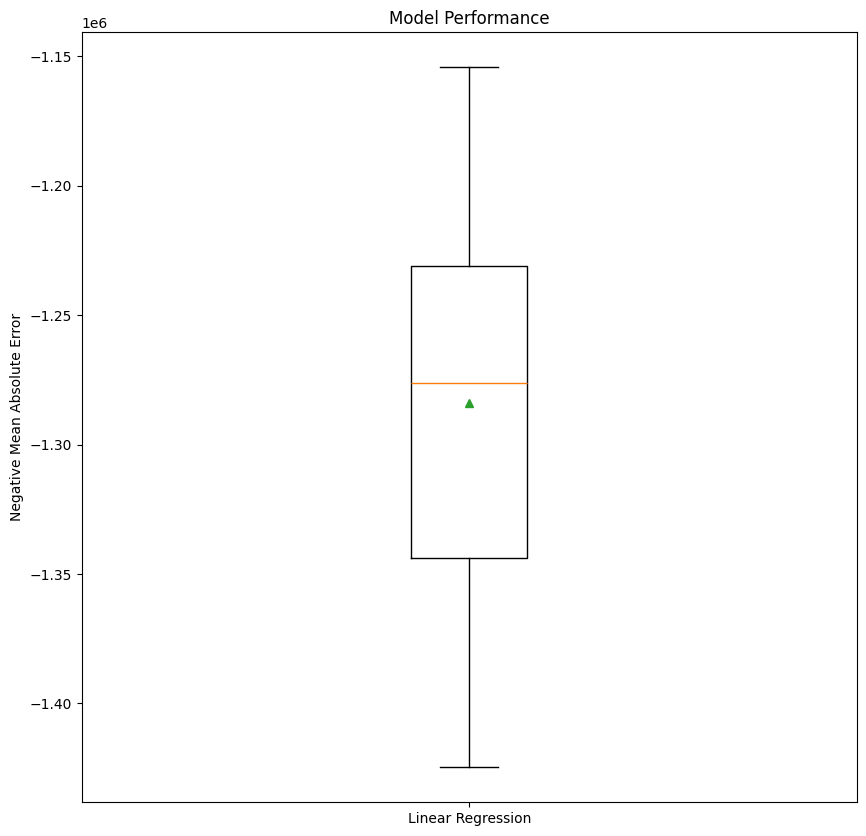

In [11]:
plt.figure(figsize=(10, 10))
plt.boxplot([model_linear_scores], labels=['Linear Regression'], showmeans=True)
plt.title('Model Performance')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [12]:
huber = HuberRegressor().fit(X_train, y_train)
y_pred = huber.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.021904624217182644
Mean Absolute Error: 1151054.1453237287
Median Absolute Error: 354408.0847179651
Mean Squared Error: 10245089678910.588
Root Mean Squared Error: 3200795.1635352406


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [13]:
from sklearn.linear_model import Ridge
for i in range(1,10):
    i = i/10
    print(i)
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

0.1
R-squared: 0.3508446540964595
Mean Absolute Error: 1337668.2752313588
Median Absolute Error: 777119.3657520515
Mean Squared Error: 6799597359309.825
Root Mean Squared Error: 2607603.7581100822
0.2
R-squared: 0.35092913728101893
Mean Absolute Error: 1336995.3271740493
Median Absolute Error: 776208.0939702712
Mean Squared Error: 6798712437630.813
Root Mean Squared Error: 2607434.071578956
0.3
R-squared: 0.3510107580161639
Mean Absolute Error: 1336326.1470872718
Median Absolute Error: 774616.9379871397
Mean Squared Error: 6797857498765.011
Root Mean Squared Error: 2607270.1238584793
0.4
R-squared: 0.351089576715378
Mean Absolute Error: 1335664.168942733
Median Absolute Error: 774802.2071590882
Mean Squared Error: 6797031909909.551
Root Mean Squared Error: 2607111.794670407
0.5
R-squared: 0.3511656522677755
Mean Absolute Error: 1335016.9226183118
Median Absolute Error: 775743.1218495329
Mean Squared Error: 6796235054228.618
Root Mean Squared Error: 2606958.9667328135
0.6
R-squared: 0.3

In [14]:
from sklearn.linear_model import Lasso
for i in range(1,10):
    i = i/10
    print(i)
    lasso = Lasso(alpha=i).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

0.1
R-squared: 0.35075727668415835
Mean Absolute Error: 1338344.6349367655
Median Absolute Error: 779479.0225051644
Mean Squared Error: 6800512596665.098
Root Mean Squared Error: 2607779.246152768
0.2
R-squared: 0.3507573068996762
Mean Absolute Error: 1338344.2349655086
Median Absolute Error: 779477.1392164554
Mean Squared Error: 6800512280171.739
Root Mean Squared Error: 2607779.185470223
0.3
R-squared: 0.3507573371037701
Mean Absolute Error: 1338343.8350347185
Median Absolute Error: 779475.2558174117
Mean Squared Error: 6800511963798.043
Root Mean Squared Error: 2607779.1248106197
0.4
R-squared: 0.3507573672566605
Mean Absolute Error: 1338343.4352949448
Median Absolute Error: 779473.3718975564
Mean Squared Error: 6800511647960.678
Root Mean Squared Error: 2607779.0642538485
0.5
R-squared: 0.350757397454428
Mean Absolute Error: 1338343.0353825565
Median Absolute Error: 779471.4884483381
Mean Squared Error: 6800511331653.245
Root Mean Squared Error: 2607779.0036069476
0.6
R-squared: 0.

In [15]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(3,10):
    print(i)
    neig2 = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    y_pred = neig2.predict(X_test)
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

3
R-squared: -0.3911723393830133
Mean Absolute Error: 1782917.9689349113
Median Absolute Error: 635000.0
Mean Squared Error: 14571876862613.414
Root Mean Squared Error: 3817312.780296293
4
R-squared: -0.2550260294838955
Mean Absolute Error: 1724057.6368343194
Median Absolute Error: 632625.5
Mean Squared Error: 13145808210307.535
Root Mean Squared Error: 3625714.8550744494
5
R-squared: -0.14210815486286044
Mean Absolute Error: 1662662.7606508876
Median Absolute Error: 659099.9
Mean Squared Error: 11963046507831.844
Root Mean Squared Error: 3458763.7253550356
6
R-squared: -0.1569280744947712
Mean Absolute Error: 1686892.295118343
Median Absolute Error: 674383.3333333333
Mean Squared Error: 12118278205499.012
Root Mean Squared Error: 3481131.7420486994
7
R-squared: -0.13538855056815824
Mean Absolute Error: 1682482.300507185
Median Absolute Error: 668857.1428571428
Mean Squared Error: 11892661808843.855
Root Mean Squared Error: 3448573.8804386742
8
R-squared: -0.08861798829656009
Mean Abso

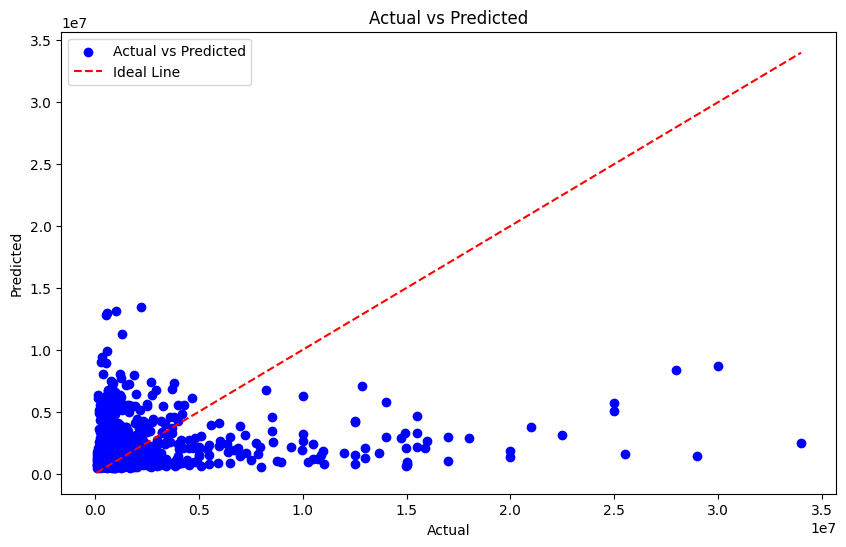

In [16]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [17]:
from sklearn.tree import  DecisionTreeRegressor
huber = HuberRegressor().fit(X_train, y_train)
y_pred = huber.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.021904624217182644
Mean Absolute Error: 1151054.1453237287
Median Absolute Error: 354408.0847179651
Mean Squared Error: 10245089678910.588
Root Mean Squared Error: 3200795.1635352406


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: -0.07318516036967604
Mean Absolute Error: 952325.1597633136
Median Absolute Error: 214500.0
Mean Squared Error: 11241110511603.877
Root Mean Squared Error: 3352776.5376779702


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train)

0.9395672144124045

In [20]:
rf_model.score(X_test, y_test)

0.7010809295137019

In [21]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)
pipe_tree = Pipeline([
    ('linear', RandomForestRegressor())
])

model_trees_scores = cross_val_score(pipe_tree, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_trees_scores

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 10))
plt.boxplot([model_trees_scores], labels=['Forest Regression'], showmeans=True)
plt.title('Model Performance')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [24]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

model_results = []
model_names = []

for name,model in models.items():
    a = model.fit(X_train,y_train)
    y_pred = a.predict(X_test)
    score = r2_score(y_test, y_pred)#np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'R_squared'}).sort_values(by='R_squared',ascending=False)
    
print(df_results)

                   Model             R_squared
7  RandomForestRegressor              0.683855
1           XGBRegressor              0.598765
2                  Ridge              0.351507
5          BayesianRidge              0.351231
6       LinearRegression              0.350757
3             ElasticNet              0.169775
0                    SVR             -0.081678
4           SGDRegressor -331162967442827264.0


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 1000),  
    'max_depth': randint(1, 50), 
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20),   
    'max_features': ['auto', 'sqrt', 'log2', None], 
}

rf = RandomForestRegressor()

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12

Best Parameters: {'max_depth': 29, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 918}
Test RMSE: 1787061.3366022934
R squared: 0.6951091724137697


In [27]:

y_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", test_rmse)
print("train R squared:", r2_score(y_train, best_model.predict(X_train)))
print("R squared:", r2_score(y_test, y_pred))

Test RMSE: 1787061.3366022934
R squared: 0.8573276142267436
R squared: 0.6951091724137697


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_x=X.copy()
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]
  
print(vif_data)

          feature        VIF
0      Unnamed: 0   3.653890
1          BROKER   3.450267
2        LATITUDE  24.628951
3       LONGITUDE  46.347128
4            TYPE   3.730090
5         BOROUGH   3.260982
6   NEIGHBOURHOOD   4.521472
7            BEDS   9.242991
8        POSTCODE  13.104875
9            BATH   8.254795
10   PROPERTYSQFT   5.655131


In [29]:
from sklearn.decomposition import PCA

n_comp = 3
col_names = ['feature_'+str(i) for i in range(0,n_comp)]
pca = PCA(n_components=n_comp)
data_relevant_pca = pd.DataFrame(pca.fit_transform(X), columns = col_names)
print(pca.explained_variance_ratio_)
data_relevant_pca

[0.95428175 0.04061151 0.00398859]


,feature_0,feature_1,feature_2
0,2248.856425,-201.955270,-122.022040
1,2258.045057,365.539944,-118.907966
2,2245.792862,-261.889998,-120.628307
3,2256.441481,368.132610,-32.132768
4,2244.873990,-201.792043,-120.415919
...,...,...,...
4501,-2252.386664,-181.256849,-100.132426
4502,-2246.243338,195.761038,-11.169672
4503,-2253.429476,-121.838866,-112.351531
4504,-2253.383716,-105.163441,95.015376


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_x=data_relevant_pca.copy()
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]
  
print(vif_data)

     feature  VIF
0  feature_0  1.0
1  feature_1  1.0
2  feature_2  1.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_relevant_pca, y, test_size=0.3, random_state=42)

In [34]:
model_results = []
model_names = []

for name,model in models.items():
    a = model.fit(X_train,y_train)
    y_pred = a.predict(X_test)
    score = r2_score(y_test, y_pred)#np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'R_squared'}).sort_values(by='R_squared',ascending=False)
    
print(df_results)

                   Model            R_squared
5          BayesianRidge             0.044645
3             ElasticNet             0.044478
2                  Ridge             0.044477
6       LinearRegression             0.044477
7  RandomForestRegressor            -0.011701
0                    SVR            -0.081679
1           XGBRegressor            -0.273507
4           SGDRegressor -44227732054963728.0
